# Employee Churn
## Objective: Predict Employee Churn
It is a common problem in data science to predict churn of some sort. That churn might be in a variety of areas including whether an employee stays at a company or whether a potential lead converts to a paying customer. The purpose of this analysis is to look at a company's employee satisfaction data and predict employee churn using a machine learning approach. 

## Summary:
From the analysis, it becomes clearer what factors might be contributing to employee churn. Notably, employees with lower satisfaction ratings appear to be more likely to leave. There's a noticeable trend where employees reporting either longer than average working hours, or conversely, too few hours, tend to churn. In the last evaluations, a distinct pattern emerges where employees who exited were either high achievers with top reviews or were underperforming. Regarding the number of projects, there's a tendency for departing employees to have been assigned more projects, aligning with the observation that many were working longer hours. Although the tenure at the company for those who left was slightly longer than for those who stayed, there's a potential opportunity here. Implementing recognition initiatives from HR at critical junctures could show appreciation for employees' contributions, possibly encouraging a longer stay within the company.

# 1. Data Import and Validation 
The dataset contains data about employees that have left and still remain with a company. The variables contain the following features: 

| Column Name | Type | Details |
|:--------|:--------|:--------|
| satisfaction_level | numeric boolean   |  Scale (0 to 1) 1 being highly satisfied |
| last_evaluation | numeric boolean   |  Scale (0 to 1) 1 being a high performance rating  |
| number_project | integer   | The number of projects an employee is assigned  |
| work_accident | numeric boolean | (1) was in accident, (0) was not in accident
| left | numeric boolean | (1) the employee left the company, (0) the employee did not leave the company
| promotion_last_5years | numeric boolean | (1) received a promotion in the last 5 years, (0) did not receive promotion
| sales | categorical |  the department the employee belongs
| salary | ordinal | low, medium, or high


First, we import the necessary libraries for data manipulation and visualization, and then load the dataset. 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Load data from local csv file
df = pd.read_csv('data/employee_satisfaction.csv')
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


# 2. Data Cleaning and Exploration
In order to prepare for the classification analysis, a number of columns need some massaging to make sure that the data are high quality. 

In [3]:
print(df.dtypes)

# Check for missing values
null = df.isnull().sum()

# Check for duplicates
dup = df.duplicated().sum()

print(f"\n\nMissing Values: \n {null} \n \n Duplicates: {dup}")

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object


Missing Values: 
 satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64 
 
 Duplicates: 3008


In [4]:
df.rename(columns={'sales':'department'}, inplace=True) # Rename column "sales" to "department" for a more descriptive name
df['department']=df['department'].astype('category') # Convert department and salary to categorical variables from string
df['salary']=df['salary'].astype('category')
df = pd.get_dummies(df, prefix = ['depart','salary'], columns=['department','salary'],drop_first=True, dtype=int) # Create dummy variables, dropping first to eliminate redundancy
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,depart_RandD,depart_accounting,depart_hr,depart_management,depart_marketing,depart_product_mng,depart_sales,depart_support,depart_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [5]:
# Do a quick exploratory analysis to make sure everything looks okay prior to analysis
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,depart_RandD,depart_accounting,depart_hr,depart_management,depart_marketing,depart_product_mng,depart_sales,depart_support,depart_technical,salary_low,salary_medium
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.052470,0.051137,0.049270,0.042003,0.057204,0.060137,0.276018,0.148610,0.181345,0.487766,0.429762
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.222981,0.220284,0.216438,0.200602,0.232239,0.237749,0.447041,0.355715,0.385317,0.499867,0.495059
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 3. Model Selection and Fit
When working with machine learning algorithms, there are a wide variety of them that could be used. To choose the best one, I am going to use a pipeline approach to look at the performance within each one and choose the one that best matches the current data. I am going to use a 80/20 split for additional validation. 

In [6]:
# Split out the column we are trying to predict into a different object ("left") and drop it from your 
# explanatory variables data frame
target = df['left']
df = df.drop(columns = 'left')
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,depart_RandD,depart_accounting,depart_hr,depart_management,depart_marketing,depart_product_mng,depart_sales,depart_support,depart_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0


In [7]:
# Partition the data with a test_size of 0.2 and random_state of 123
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train, x_valid, y_train, y_valid = train_test_split(df, target, test_size = 0.2, random_state=123)


To assist with later classification, I am going to create a function that plots the confusion matrix and allows for a more detailed view of the accuracy of the classification

### Pipeline Approach

This approach will examine 4 different algorithms by first performing a grid search within each algorithm to identify the optimal hyperparameters and then choosing the best algorithm based on the AUC-ROC score. The AUC-ROC (Area Under the Receiver Operating Characteristic Curve) is often considered a superior metric as it provides a comprehensive view of the model's performance across all classification thresholds, enabling a balanced evaluation of true positive and false positive rates, which is particularly valuable in imbalanced dataset scenarios or when both false positives and false negatives carry different costs.

After the optimal model has been chosen, I will visualize the confusion matrix. 

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Create a list with all the models
model_param_grid = {
    KNeighborsClassifier(): {
        'n_neighbors': [1, 3, 5, 7, 9]
    },
    LogisticRegression(random_state=123, max_iter=1000): {
        'solver': ['lbfgs', 'liblinear'],
        'C': [0.01, 0.1, 1, 10, 100]
    },
    DecisionTreeClassifier(random_state=123): {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30, 40, 50]
    },
    RandomForestClassifier(random_state=123): {
        'n_estimators': [10, 50, 100, 200],
        'max_depth': [None, 10, 20, 30, 40, 50],
    }
}

In [9]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix


# Create the list of models and the AUC-ROC of each model
model_list = []
roc_auc_list = []  # Create an empty list to store AUC-ROC values
best_model = None
best_auc_roc = 0

# Perform GridSearchCV for each model
for model, param_grid in model_param_grid.items():
    print(f"Optimizing model: {model.__class__.__name__}")
    grid_search = GridSearchCV(model, param_grid, scoring='roc_auc', cv=5)
    grid_search.fit(x_train, y_train)
    best_model = grid_search.best_estimator_  # Get the best model from grid search
    print(f"Best parameters: {grid_search.best_params_}")
    
    model_list.append(model.__class__.__name__)
    y_prob = best_model.predict_proba(x_valid)[:, 1]  # Get the probability estimates of the positive class
    roc_auc_list.append(roc_auc_score(y_valid, y_prob))  # Compute and store the AUC-ROC

    # Keep track of the best model
    auc_roc = roc_auc_score(y_valid, y_prob)
    if auc_roc > best_auc_roc:
        best_auc_roc = auc_roc
        best_model = grid_search.best_estimator_

# Compare the performance of the models in a dataframe
result_df = pd.DataFrame({'Model': model_list, 'AUC-ROC': roc_auc_list})
result_df.sort_values(by='AUC-ROC', ascending=False)  # Maximize the AUC-ROC

Optimizing model: KNeighborsClassifier
Best parameters: {'n_neighbors': 7}
Optimizing model: LogisticRegression
Best parameters: {'C': 0.1, 'solver': 'lbfgs'}
Optimizing model: DecisionTreeClassifier
Best parameters: {'criterion': 'entropy', 'max_depth': 10}
Optimizing model: RandomForestClassifier
Best parameters: {'max_depth': 20, 'n_estimators': 200}


,Model,AUC-ROC
3,RandomForestClassifier,0.995097
2,DecisionTreeClassifier,0.988833
0,KNeighborsClassifier,0.974282
1,LogisticRegression,0.814331


As can be seen above, the Random Forest Classifier is the most accurate when looking at the AUC-ROC. So, that will be visualized below using a custom function that wraps around the sklearn confusion_matrix and adds prettier labels and shading. 

In [10]:
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm=cm.astype('float') / cm.sum(aix=1)[:, np.newaxis]
        print("Normalized confusion Matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j], fmt),
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[2285    6]
 [  17  692]]


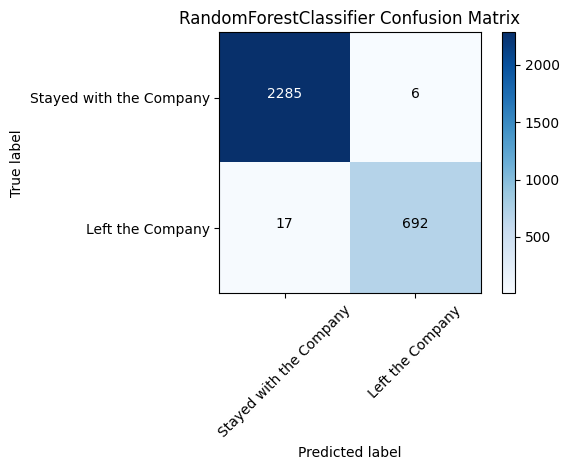

In [11]:
# Create a confusion matrix for the best model
y_pred = best_model.predict(x_valid)
cm = confusion_matrix(y_valid, y_pred)

# Call your custom function to plot the confusion matrix
plot_confusion_matrix(cm, 
                      classes = ['Stayed with the Company', 'Left the Company'], 
                      title=f'{best_model.__class__.__name__} Confusion Matrix')
plt.show()

# # Visualize the confusion matrix
# plot_confusion_matrix(best_model, x_valid, y_valid, cmap=plt.cm.Blues)
# plt.show()

### Feature Importance 
Understanding the importance of features used in your machine learning model is not merely a quest for model interpretability, but also a practical necessity in many real-world applications. Unveiling the significance of each feature helps in shedding light on the underlying patterns that the model has unearthed from the data. By analyzing feature importance, we can pinpoint which variables have a more pronounced impact on the model's predictions, thus allowing for a more nuanced understanding of the problem at hand.

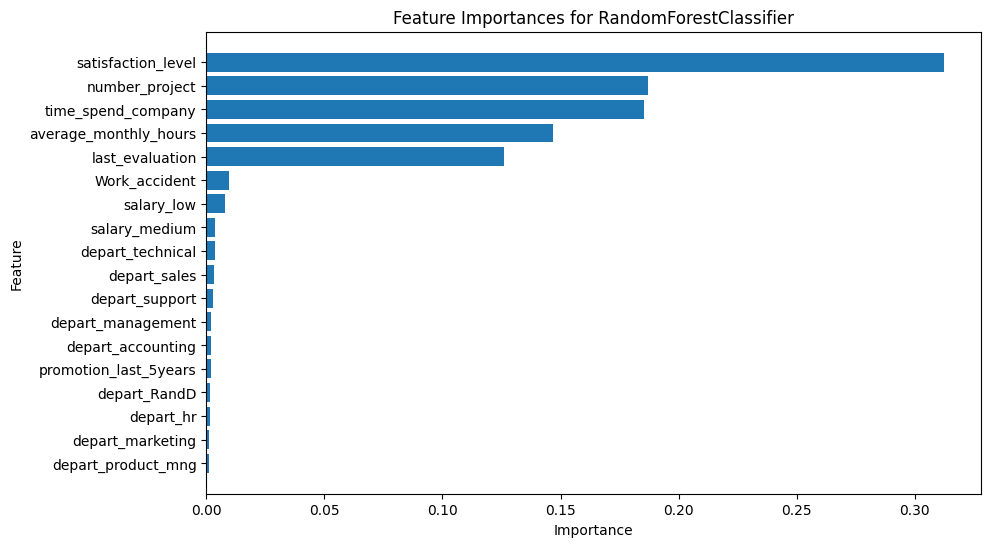

In [12]:
# Check if the best model has a feature_importances_ attribute
if hasattr(best_model, 'feature_importances_'):
    # Get feature importances
    importances = best_model.feature_importances_
    
    # Get feature names (assuming your data has column names)
    feature_names = x_train.columns
    
    # Create a DataFrame for the feature importances
    feature_importances_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })
    
    # Sort the DataFrame by the importances
    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
    
    # Plot the feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'Feature Importances for {best_model.__class__.__name__}')
    plt.gca().invert_yaxis()  # Invert the y-axis to have the most important feature at the top
    plt.show()
else:
    print(f"The {best_model.__class__.__name__} model does not support feature importances.")


From the feature importances above, it is clear that employee satisfaction level is the most important attribute when deciding to leave a company, followed by a number of other attributes. However, the feature importances do not get all the way to actionable insights because they only tell the importance rather than the direction. One way to look at the direction of the feature importance is to look at permutation importance.  

### Permutation Importance
The permutation_importance function measures the importance of features by shuffling each feature's values and observing the decrease in the model's performance. In the plot generated, each bar represents a feature, and the height of the bar indicates the feature's importance with higher bars being more important. Post this, we plotted the distribution of important feature values against the target variable classes using violin plots. This helps in inferring the direction of the relationship between important features and the target variable. The combination of permutation importance with distribution plots provides a balanced approach to understanding feature importance and their relationships with the target variable in a Random Forest model.

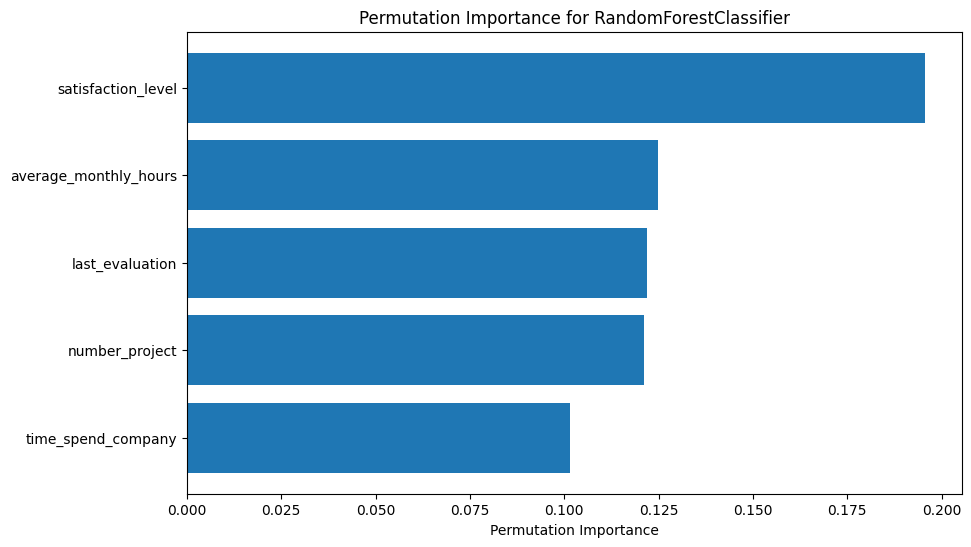

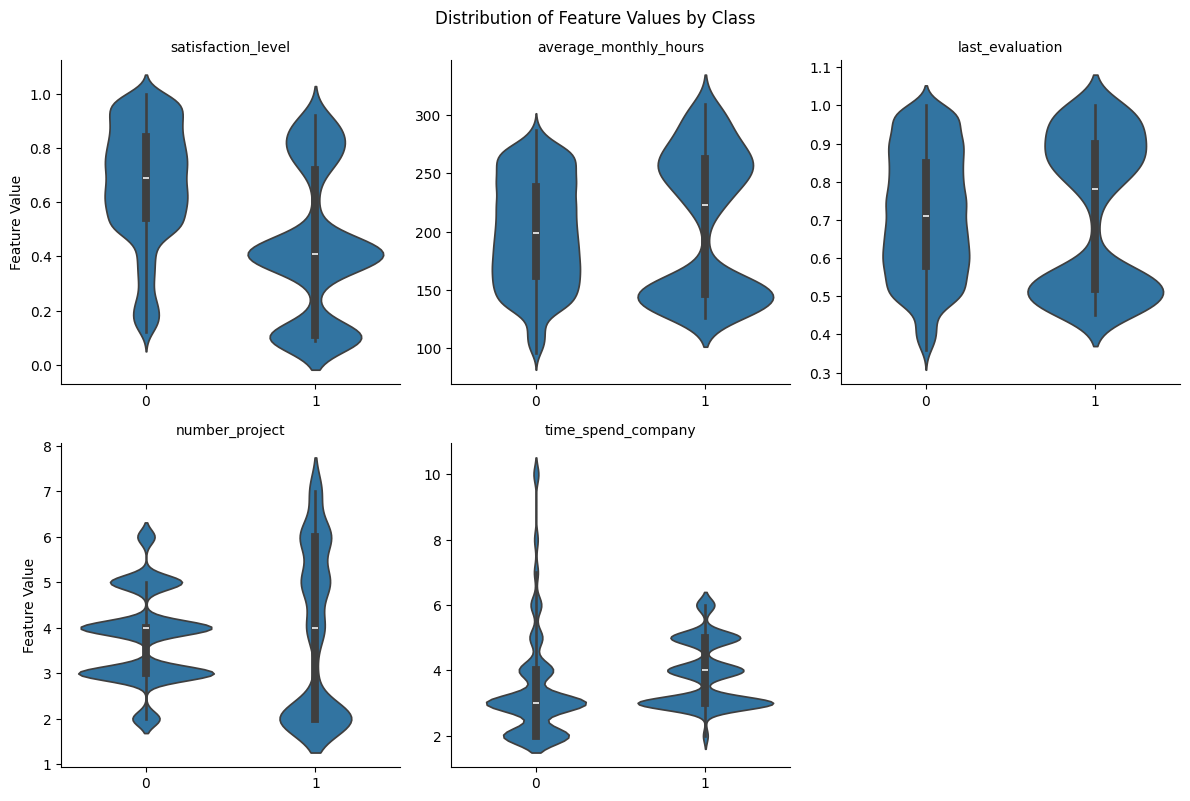

In [13]:
from sklearn.inspection import permutation_importance
import seaborn as sns
import matplotlib.pyplot as plt

# Check if the best model is a Random Forest model
if isinstance(best_model, RandomForestClassifier):
    # Calculate permutation importance
    perm_importance = permutation_importance(best_model, x_valid, y_valid, n_repeats=30, random_state=42)

    # Plot permutation importance
    sorted_idx = perm_importance.importances_mean.argsort()[::-1]  # Reverse the order for descending importance
    plt.figure(figsize=(10, 6))
    plt.barh(x_train.columns[sorted_idx][:5], perm_importance.importances_mean[sorted_idx][:5])  # Top 5 features
    plt.xlabel("Permutation Importance")
    plt.title(f'Permutation Importance for {best_model.__class__.__name__}')
    plt.gca().invert_yaxis()  # Invert the y-axis to have the most important feature at the top
    plt.show()

    # For important features, plot the distribution of feature values with respect to the target variable
    # Assuming binary classification (0 and 1 as class labels)
    important_features = x_train.columns[sorted_idx][:5]  # Top 5 important features

    # Create a DataFrame for the feature values and target variable
    data = x_train.copy()
    data['Target'] = y_train

    # Set up the facet grid
    g = sns.FacetGrid(data.melt(id_vars='Target', value_vars=important_features),
                      col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
    g.map(sns.violinplot, 'Target', 'value', order=[0, 1])
    g.set_axis_labels("", "Feature Value")
    g.set_titles('{col_name}')
    plt.suptitle('Distribution of Feature Values by Class', y=1.02)
    plt.show()
else:
    print(f"The {best_model.__class__.__name__} model does not support permutation importance.")


From the graph, it becomes clearer what factors might be contributing to employee churn. Notably, employees with lower satisfaction ratings appear to be more likely to leave. There's a noticeable trend where employees reporting either longer than average working hours, or conversely, too few hours, tend to churn. In the last evaluations, a distinct pattern emerges where employees who exited were either high achievers with top reviews or were underperforming. Regarding the number of projects, there's a tendency for departing employees to have been assigned more projects, aligning with the observation that many were working longer hours. Although the tenure at the company for those who left was slightly longer than for those who stayed, there's a potential opportunity here. Implementing recognition initiatives from HR at critical junctures could show appreciation for employees' contributions, possibly encouraging a longer stay within the company.

# The End